# Panama Apartments Pricing | Data Preprosecing Notebook
In this notebook we perform the following:
- data cleaning: 
    - treatment of missing values
    - treatement of outliers
- Exploratory Data Analysis (EDA):
    - identify highly correlated features (multicolinearity)
    - identify the trends in the data
    - interpretatation of data (does it make sense)
- Data Normalization
    - evaluate possibles tranformation of target and feature variables if needed

In [3]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Data Input

In [42]:
df = pd.read_csv("data/data.csv")

**Note**: Excel is more convenient for coorecting the add_**price column**. Therefore prior to this cleaning. I used excel to remove **'B/.'**, and reduced percentages in the price columns

In [43]:
df

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,"Panama Viejo Residences, en Panama Viejo",139000.00000,58.00000,2,2.00000,1,139000
1,Armonía en Cinta Costera,124500.00000,45.24000,1,1.00000,NaN,124500
2,"Coco Place en Coco del Mar, San Francisco",233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments in El Cangrejo | El Cangrejo Porto ...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments in El Bosque | El Bosque Alsacia To...,118000.00000,66.00000,2,2.00000,1,118000
...,...,...,...,...,...,...,...
9822,Apartments in Santa María | Edificio Único en ...,305000.00000,96.00000,2,2.50000,2,305000
9823,The Regent Costa del Este venta,380000.00000,95.00000,2,2.00000,NaN,380000
9824,Apartments in Coco del Mar | Para Inversionist...,274000.00000,79.00000,2,2.00000,2,274000
9825,Apartments in San Francisco | Sale of reposses...,200000.00000,124.00000,3,2.50000,2,200000


## Data Cleaning
### Replace non-alphanumeric values

In [44]:
# replace non-alphanumeric values on titles add
for i in range(len(df["add_title"])):
    df["add_title"][i] = re.sub(r'[^a-zA-Z0-9]', '_', df["add_title"][i])

c:\users\a-gue\onedrive\documentos\python_projects\panama_apt_pricing\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
df.head()

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,Panama_Viejo_Residences__en_Panama_Viejo,139000.00000,58.00000,2,2.00000,1,139000
1,Armon_a_en_Cinta_Costera,124500.00000,45.24000,1,1.00000,NaN,124500
2,Coco_Place_en_Coco_del_Mar__San_Francisco,233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments_in_El_Cangrejo___El_Cangrejo_Porto_...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments_in_El_Bosque___El_Bosque_Alsacia_To...,118000.00000,66.00000,2,2.00000,1,118000


### Find Missing Values

In [46]:
df.isna().sum()

add_title         0
add_price        13
add_area_val     57
add_bed_val       0
add_bath_val      0
add_park_val    222
Unnamed: 6       13
dtype: int64

In [47]:
# we will drop all rows where at least one value is missing
df.dropna(inplace=True)

In [48]:
df.describe()

,add_price,add_area_val,add_bed_val,add_bath_val
count,9547.00000,9547.00000,9547.00000,9547.00000
mean,610381.65515,232.05463,2.61737,2.68147
std,13843407.55003,1586.40677,0.78412,0.99435
min,0.01000,0.12000,1.00000,1.00000
25%,180000.00000,97.00000,2.00000,2.00000
50%,285000.00000,148.00000,3.00000,2.50000
75%,480000.00000,236.63000,3.00000,3.50000
max,1100000000.00000,131732.00000,7.00000,10.00000


There seem to be outliers in the data in price, and the area features. We will filter those *outliers*. 
The exclusion of such outliers seem to be because of:
- typo errors in the add,
- special cases like people posting rentals instead of selling price, etc. 

### Outliers

In [49]:
# filter the outliers shown above, after some iterations the values below (for flitering) seem more realistic
df=df.loc[(df['add_price'] < 6000000.00000) & (df['add_price'] > 40000) & (df['add_area_val'] < 1000.00000) & (df['add_area_val'] > 20) & (df['add_bath_val'] < 10)]
df.describe()

,add_price,add_area_val,add_bed_val,add_bath_val
count,9414.00000,9414.00000,9414.00000,9414.00000
mean,402675.57375,187.67331,2.61398,2.67426
std,361695.60419,130.27419,0.78111,0.98150
min,41000.00000,33.00000,1.00000,1.00000
25%,180050.00000,97.00000,2.00000,2.00000
50%,285000.00000,147.00000,3.00000,2.50000
75%,480000.00000,234.50000,3.00000,3.50000
max,4998000.00000,940.00000,7.00000,8.00000


### Types
To eval in case of values that are not read as numbers

In [50]:
df.dtypes

add_title        object
add_price       float64
add_area_val    float64
add_bed_val       int64
add_bath_val    float64
add_park_val     object
Unnamed: 6       object
dtype: object

Some examples in feature 'parkings' have 'More' as value. Here' we will exclude those values

In [51]:
df=df.loc[(df['add_park_val'] != 'More')]
df.head()

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,Panama_Viejo_Residences__en_Panama_Viejo,139000.00000,58.00000,2,2.00000,1,139000
2,Coco_Place_en_Coco_del_Mar__San_Francisco,233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments_in_El_Cangrejo___El_Cangrejo_Porto_...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments_in_El_Bosque___El_Bosque_Alsacia_To...,118000.00000,66.00000,2,2.00000,1,118000
5,Apartments_in_Carrasquilla___Torres_de_Castill...,125000.00000,71.00000,2,2.00000,1,"125,000.00"


In [52]:
df['add_park_val'] = df.add_park_val.astype(int)
df.dtypes

add_title        object
add_price       float64
add_area_val    float64
add_bed_val       int64
add_bath_val    float64
add_park_val      int32
Unnamed: 6       object
dtype: object

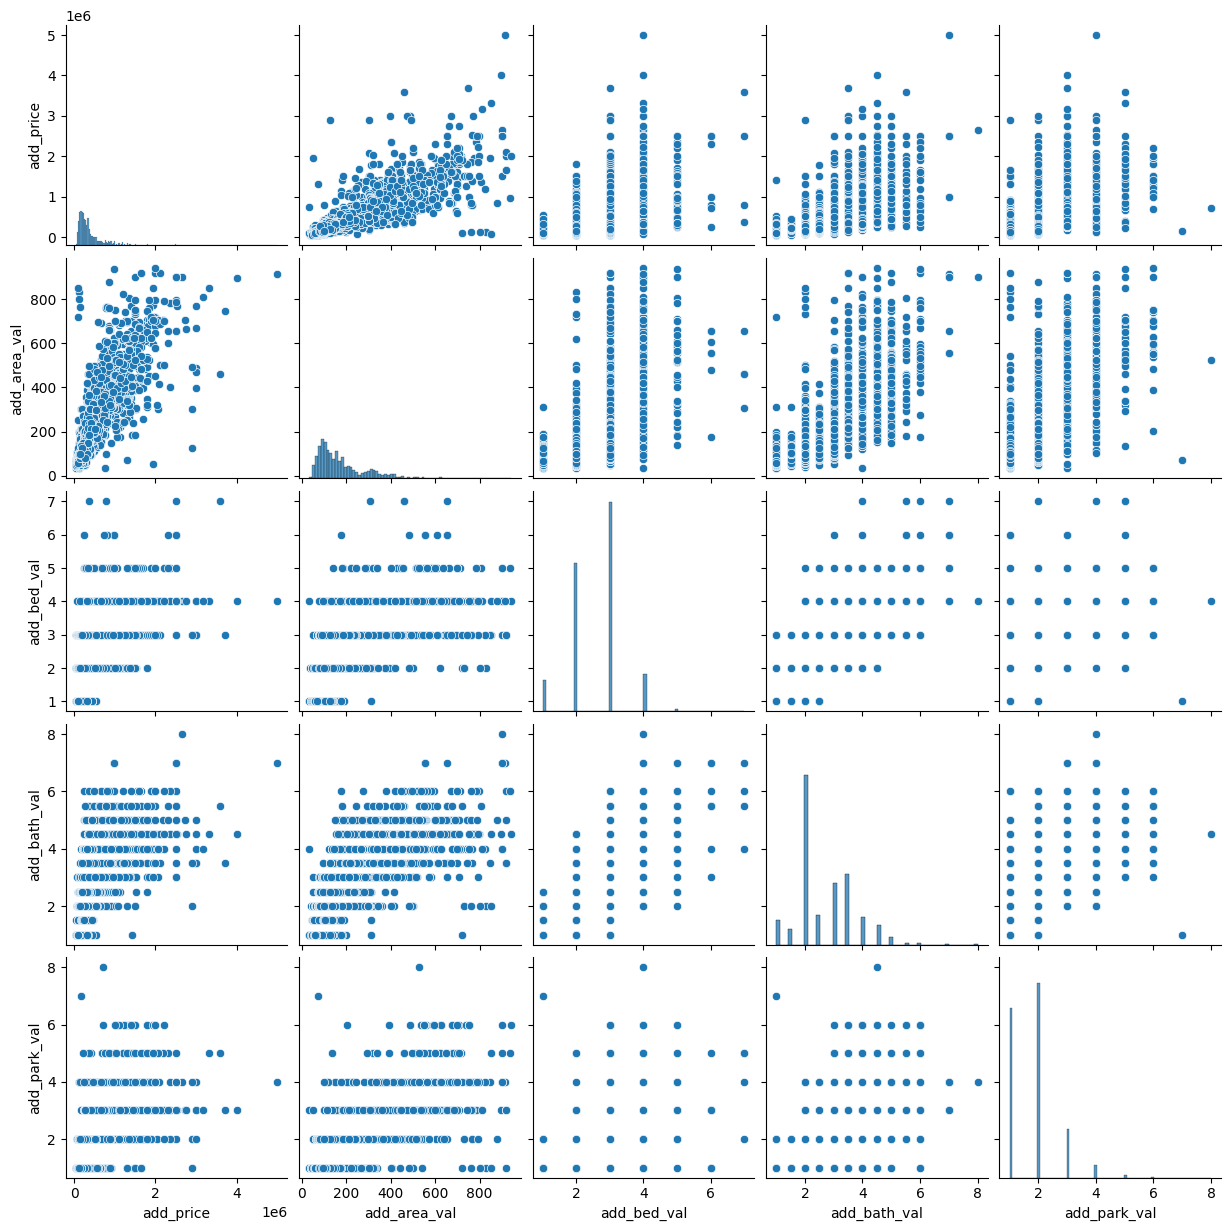

In [53]:
sns.pairplot(df,)

The data seems realistic with increase in price with respect to features like price, area, number of rooms, parking, and baths

### Save Clean Data

In [54]:
df.head()

,add_title,add_price,add_area_val,add_bed_val,add_bath_val,add_park_val,Unnamed: 6
0,Panama_Viejo_Residences__en_Panama_Viejo,139000.00000,58.00000,2,2.00000,1,139000
2,Coco_Place_en_Coco_del_Mar__San_Francisco,233259.60000,79.34000,2,2.00000,1,233259.6
3,Apartments_in_El_Cangrejo___El_Cangrejo_Porto_...,145000.00000,92.00000,2,2.00000,1,145000
4,Apartments_in_El_Bosque___El_Bosque_Alsacia_To...,118000.00000,66.00000,2,2.00000,1,118000
5,Apartments_in_Carrasquilla___Torres_de_Castill...,125000.00000,71.00000,2,2.00000,1,"125,000.00"


In [55]:
# remove columns that have no use for prediction models, and rename colums
df_clean= df.drop(['add_title', 'Unnamed: 6'], axis=1).set_axis(['price', 'area', 'beds', 'baths', 'parkings'], axis=1, inplace=False)
df_clean.to_csv('data_cl_1.csv', index=False)

______________________

## EDA

In [4]:
df_clean = pd.read_csv('data/data_cl_1.csv')

### Correlation 

c:\users\a-gue\onedrive\documentos\python_projects\panama_apt_pricing\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

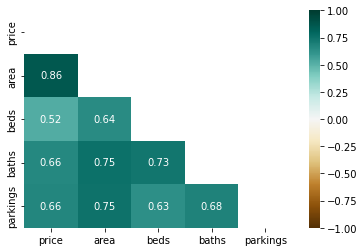

In [5]:
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

The feature area is highly correlated with the price. The features (beds, baths, parkings, area) however are highly correlated with one another. (Possible Multicolinearity if use all together for Linear Regression)

https://medium.com/@songaraankit/correlation-vs-collinearity-vs-multicollinearity-b8e4391617af 

### Trends

<AxesSubplot:xlabel='beds', ylabel='price'>

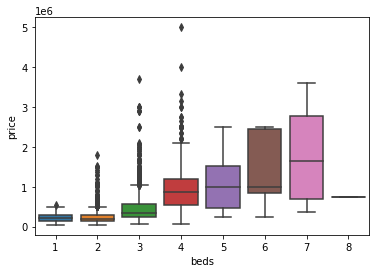

In [6]:
sns.boxplot(y='price',x='beds',data=df_clean, )

<AxesSubplot:xlabel='baths', ylabel='price'>

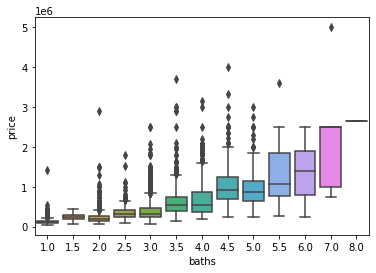

In [7]:
sns.boxplot(y='price',x='baths',data=df_clean, )

<AxesSubplot:xlabel='parkings', ylabel='price'>

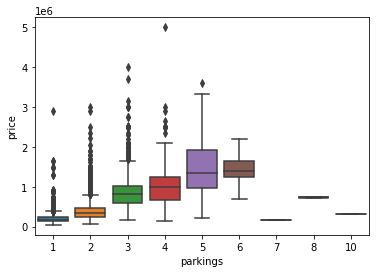

In [8]:
sns.boxplot(y='price',x='parkings',data=df_clean, )

____________
## Data Regularization, Reclasification, Rescaling, Normalization (Feature Scaling)

### a) Rescaling target Variable to thousands

In [9]:
def price_in_K(row, str):
    '''divide the target value by 1 thousand.
    '''
    row_k = row[str]/1000
    return row_k

In [10]:
df_clean["price"] = df_clean.apply(lambda row: price_in_K(row, 'price'), axis=1)
df_clean.describe()

,price,area,beds,baths,parkings
count,9410.00000,9410.00000,9410.00000,9410.00000,9410.00000
mean,402.84564,187.78016,2.61498,2.67535,1.80956
std,361.73761,130.33973,0.78283,0.98224,0.84011
min,41.00000,33.00000,1.00000,1.00000,1.00000
25%,181.25000,97.00000,2.00000,2.00000,1.00000
50%,285.00000,147.16000,3.00000,2.50000,2.00000
75%,480.00000,235.00000,3.00000,3.50000,2.00000
max,4998.00000,940.00000,8.00000,8.00000,10.00000


### b) Min Normalization Scalar for Features

In [11]:
def get_min_max_mean(df, str):
    '''return the min, max, mean of variable on data frame'''
    mean_v_i = df[str].mean()
    min_v_i = df[str].min()
    max_v_i = df[str].max()
    
    return mean_v_i, min_v_i, max_v_i

In [12]:
def mean_norm_scal(row, str, mean_v, min_v, max_v):
    '''Apply min-normalization scale to value
    '''
    row = (row[str] - mean_v)/(max_v - min_v)
    return row

In [13]:
def get_normalized_vector(df, str):
    mean_v_i, min_v_i, max_v_i = get_min_max_mean(df_clean, str)
    mean_norm_vector = df.apply(lambda row: mean_norm_scal(row, str, mean_v_i, min_v_i, max_v_i), axis=1)
    return mean_norm_vector

#### Apply Min-Normalization to Target Variable

In [14]:
mean_norm_y = get_normalized_vector(df_clean, 'price')

#### Apply Min-Normalization to Features

In [15]:
# in this we only have 4 features so we can just copy pase. For more variable write a function
mean_norm_x1 = get_normalized_vector(df_clean, 'area')
mean_norm_x2 = get_normalized_vector(df_clean, 'beds')
mean_norm_x3 = get_normalized_vector(df_clean, 'baths')
mean_norm_x4 = get_normalized_vector(df_clean, 'parkings')

In [16]:
df_scaled = pd.DataFrame(mean_norm_y, columns=['scaled_y'])

In [17]:
df_scaled['y'] = df_clean.price

In [38]:
df_scaled['x1'] = df_clean.area

In [39]:
df_scaled['scaled_x1'] = mean_norm_x1

In [40]:
df_scaled['scaled_x2'] = mean_norm_x2

In [41]:
df_scaled['scaled_x3'] = mean_norm_x3

In [42]:
df_scaled['scaled_x3'] = mean_norm_x3

In [43]:
df_scaled['scaled_x4'] = mean_norm_x4

## Create Dummies
This is to account for the number of beds and avoid the interaction with area directly

In [44]:
beds_thres = 3 # number of beds that express a difference between upper and lower class
arr_beds = np.where(df_clean['beds'] > beds_thres, 1, 0)

In [45]:
bath_thres = 3 # number of beds that express a difference between upper and lower class
arr_baths = np.where(df_clean['baths'] > bath_thres, 1, 0)

In [46]:
park_thres = 4 # number of beds that express a difference between upper and lower class
arr_park = np.where(df_clean['parkings'] > park_thres, 1, 0)

### Save to data scaled

In [47]:
df_scaled['x_2_dumm'] = arr_beds
df_scaled['x_3_dumm'] = arr_baths
df_scaled['x_4_dumm'] = arr_park

In [48]:
df_scaled.to_csv('data/data_scaled.csv', index=False)